*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Strategic Thinking
*Assessment Title: CA 2 Capstone Report
*Assessment Due Date: 16 April 2024 
*Date of Submission: 19 May 2024

# Discovery

## Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## Reading the Data

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('housing.csv', encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_13608\1655641777.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
77760,https://bj.lianjia.com/chengjiao/101101663478....,101101663478,116.338384,39.934691,1111027377332,2017-08-30,86.0,73,688.0,102047,...,1.0,1998,4,6,0.250,1.0,1.0,1.0,8,96480.0
125143,https://bj.lianjia.com/chengjiao/BJCY84427041....,BJCY84427041,116.419996,40.001599,1111027375591,2012-04-10,1.0,0,160.0,26583,...,1.0,1988,1,6,0.250,1.0,0.0,1.0,7,66462.0
196443,https://bj.lianjia.com/chengjiao/BJDC84711729....,BJDC84711729,116.434254,39.935275,1111027378565,2012-07-22,NaN,0,348.0,50641,...,4.0,2003,1,6,0.500,0.0,0.0,1.0,1,122506.0
106028,https://bj.lianjia.com/chengjiao/BJCP88496670....,BJCP88496670,116.354215,40.083501,1111027378211,2014-11-29,1.0,2,293.0,23459,...,4.0,2003,1,2,0.500,0.0,0.0,0.0,6,39052.0
142475,https://bj.lianjia.com/chengjiao/BJCY86088467....,BJCY86088467,116.523444,39.924450,1111027376687,2014-01-24,1.0,7,700.0,23922,...,1.0,2000,1,6,0.375,1.0,0.0,1.0,7,58126.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 77760 to 192545
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32360 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null 

In [5]:
data.shape

(63770, 26)

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,32360.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.000000,63357.000000,63770.000000,63770.000000,63770.000000,63767.000000,63767.000000,63767.000000,63770.000000,63685.000000
mean,116.418362,39.949980,1.118301e+12,28.764802,16.930955,350.034069,43620.215619,83.274184,0.994417,3.009055,2.616371,4.450525,0.380424,0.575784,0.644565,0.604592,6.754932,63698.403549
std,0.112214,0.092109,9.183036e+11,49.174302,35.075965,227.414569,21738.785479,37.037140,0.106259,1.271235,1.311226,1.901758,0.176913,0.494227,0.478649,0.488942,2.822089,22353.870929
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.345084,39.893658,1.111027e+12,1.000000,0.000000,205.000000,28038.000000,57.940000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46278.000000
50%,116.416780,39.934691,1.111027e+12,7.000000,5.000000,295.000000,38809.500000,74.290000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59025.000000
75%,116.477171,40.003028,1.111027e+12,37.000000,19.000000,428.000000,54009.750000,98.890000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,76016.000000
max,116.732378,40.252758,1.178008e+14,865.000000,1085.000000,4100.000000,150000.000000,586.000000,4.000000,4.000000,4.000000,6.000000,3.333000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Data Preparation

Convert object columns to numeric:

In [7]:
extr = data["tradeTime"].str.extract(r"^(\d{4})", expand=False)

In [8]:
extr.head(10)

77760     2017
125143    2012
196443    2012
106028    2014
142475    2014
182683    2016
311982    2016
266506    2016
230966    2014
13421     2016
Name: tradeTime, dtype: object

In [9]:
data['tradeTime'] = pd.to_numeric(extr, errors='coerce')

In [10]:
extr = data["constructionTime"].str.extract(r"^(\d{4})", expand=False)

In [11]:
extr.head(10)

77760     1998
125143    1988
196443    2003
106028    2003
142475    2000
182683    1993
311982    1998
266506    1998
230966    1992
13421     2002
Name: constructionTime, dtype: object

In [12]:
data['constructionTime'] = pd.to_numeric(extr, errors='coerce')

In [13]:
data['livingRoom'] = pd.to_numeric(data['livingRoom'], errors='coerce')

In [14]:
data['drawingRoom'] = pd.to_numeric(data['drawingRoom'], errors='coerce')

In [15]:
data['bathRoom'] = pd.to_numeric(data['bathRoom'], errors='coerce')

In [16]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
77760,https://bj.lianjia.com/chengjiao/101101663478....,101101663478,116.338384,39.934691,1111027377332,2017,86.0,73,688.0,102047,...,1.0,1998.0,4,6,0.250,1.0,1.0,1.0,8,96480.0
125143,https://bj.lianjia.com/chengjiao/BJCY84427041....,BJCY84427041,116.419996,40.001599,1111027375591,2012,1.0,0,160.0,26583,...,1.0,1988.0,1,6,0.250,1.0,0.0,1.0,7,66462.0
196443,https://bj.lianjia.com/chengjiao/BJDC84711729....,BJDC84711729,116.434254,39.935275,1111027378565,2012,NaN,0,348.0,50641,...,4.0,2003.0,1,6,0.500,0.0,0.0,1.0,1,122506.0
106028,https://bj.lianjia.com/chengjiao/BJCP88496670....,BJCP88496670,116.354215,40.083501,1111027378211,2014,1.0,2,293.0,23459,...,4.0,2003.0,1,2,0.500,0.0,0.0,0.0,6,39052.0
142475,https://bj.lianjia.com/chengjiao/BJCY86088467....,BJCY86088467,116.523444,39.924450,1111027376687,2014,1.0,7,700.0,23922,...,1.0,2000.0,1,6,0.375,1.0,0.0,1.0,7,58126.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 77760 to 192545
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32360 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63767 non-null  float64
 12  drawingRoom          63767 non-null  float64
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  int64  
 15  floor                63770 non-null 

## Preprocesing the data

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [18]:
data.drop('url', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('floor', axis=1, inplace=True)

Dropping rows with missed prices (target variable)

In [19]:
data.dropna(subset=['price'], inplace=True)

In [20]:
missing_value_formats = ["?","NA","Na","NaN.",".NaN","NaN","nA","na","n.a","n.a.","Î´Öª",".n.a","n/a","nan","--","UnKnown"]
data.replace(missing_value_formats, float("NaN"), inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

## Calculate the number of missing values per variable

In [21]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

## Missing values graph

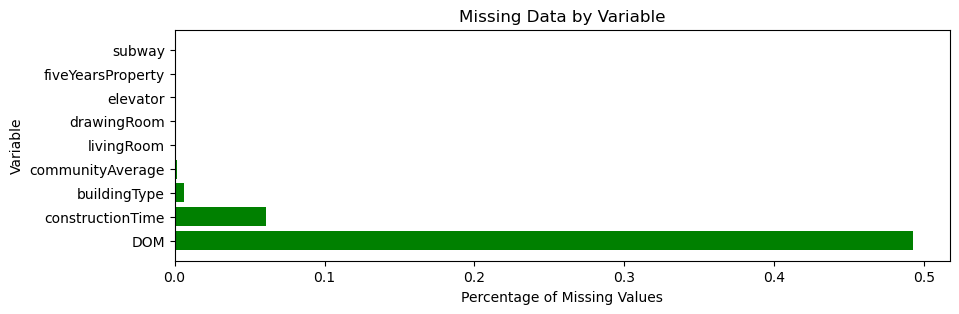

In [22]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [23]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,32360.000000,59864.000000,63357.000000,63685.000000
mean,28.764802,1999.240428,3.009055,63698.403549
std,49.174302,8.749102,1.271235,22353.870929
min,1.000000,1933.000000,0.048000,10847.000000
25%,1.000000,1994.000000,1.000000,46278.000000
50%,7.000000,2001.000000,4.000000,59025.000000
75%,37.000000,2006.000000,4.000000,76016.000000
max,865.000000,2016.000000,4.000000,183109.000000


Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [24]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

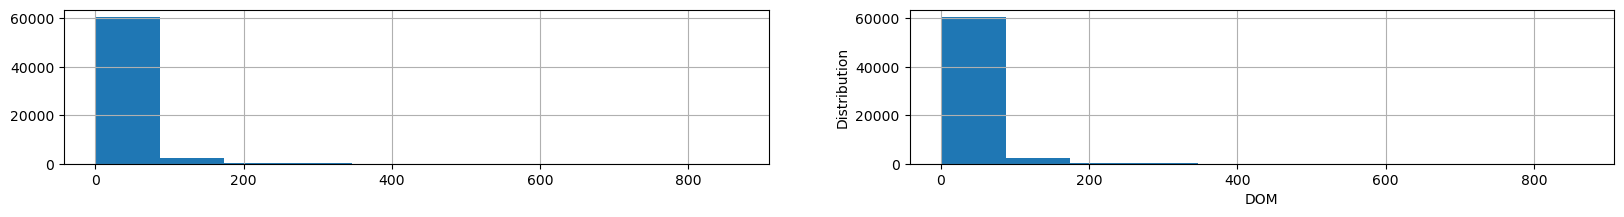

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

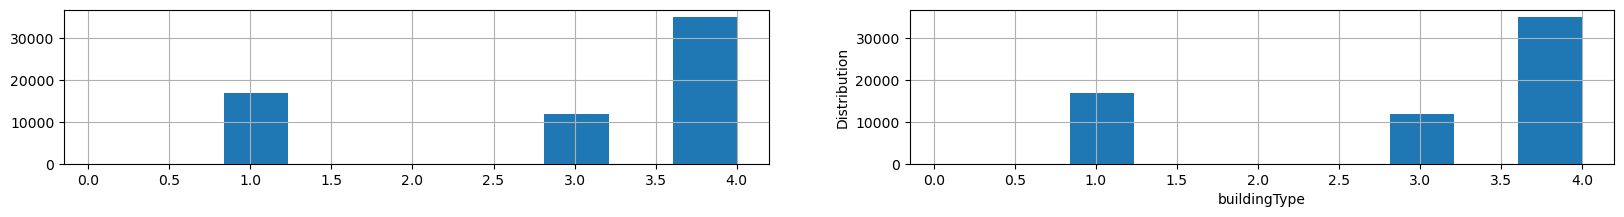

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

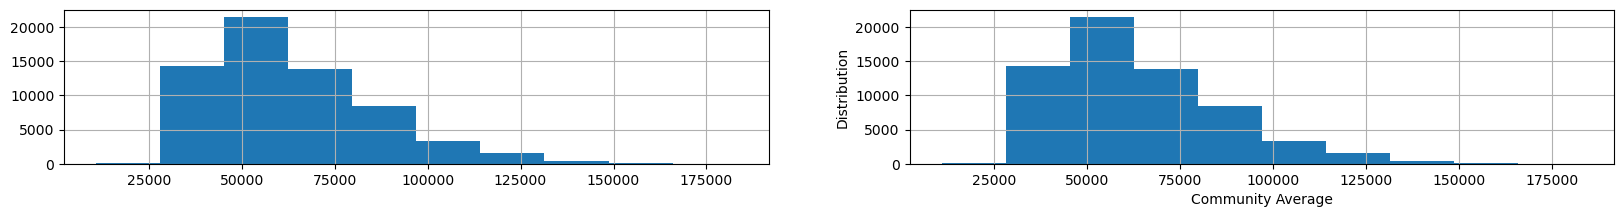

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

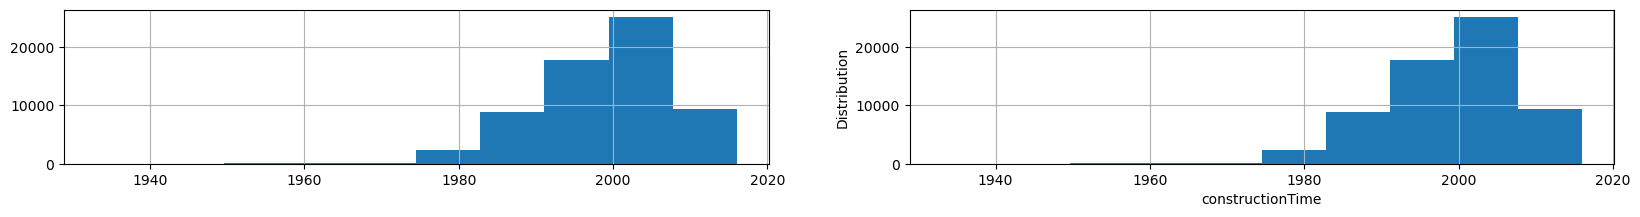

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

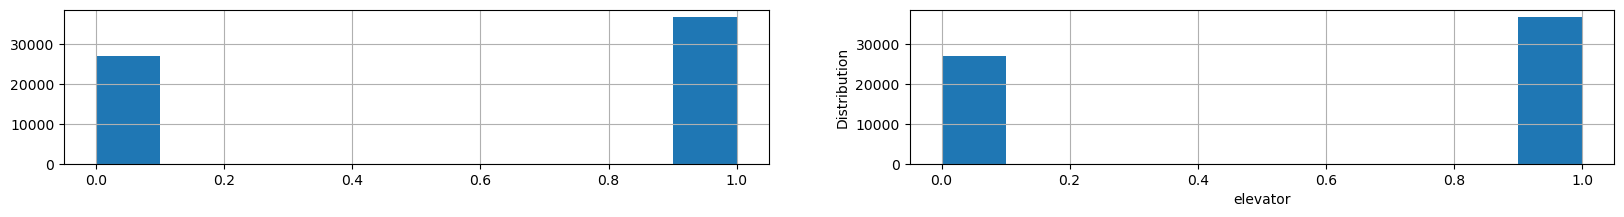

In [29]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

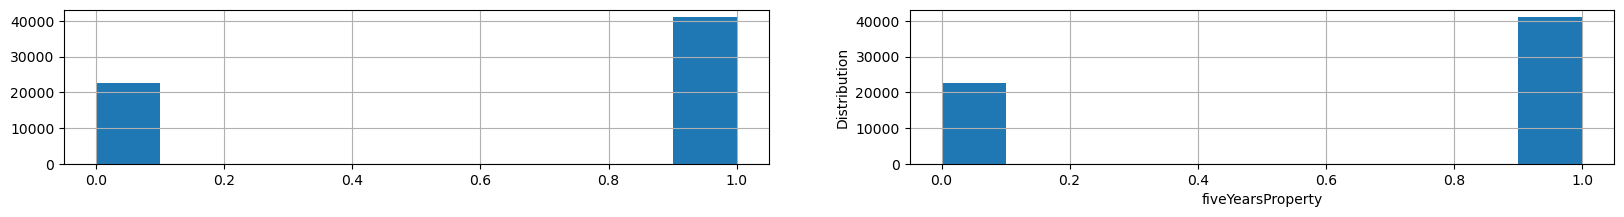

In [30]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

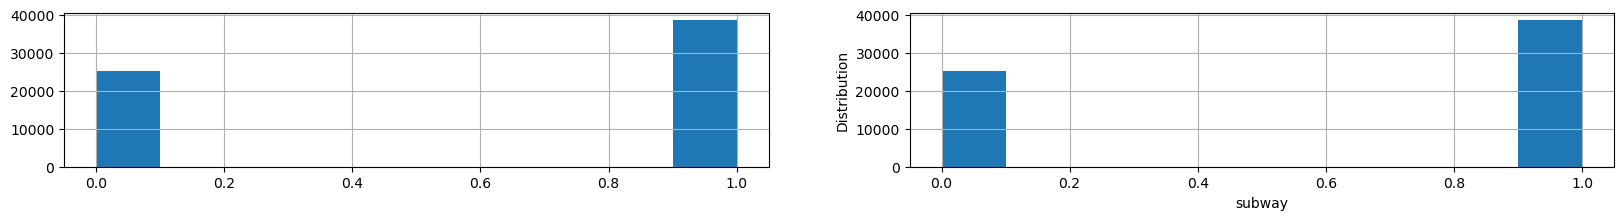

In [31]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

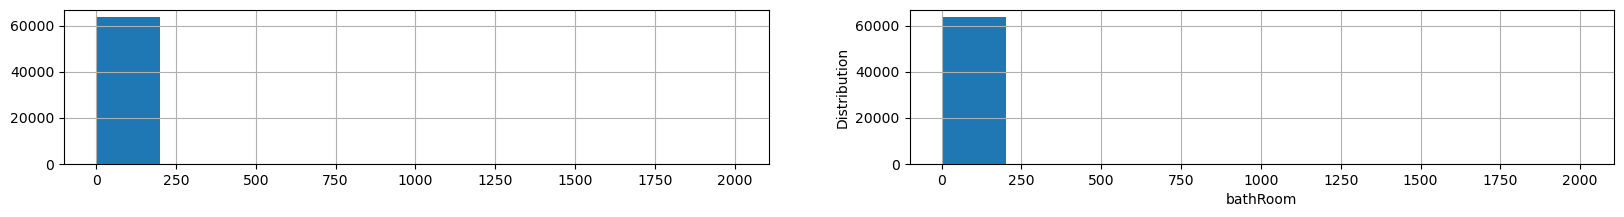

In [32]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

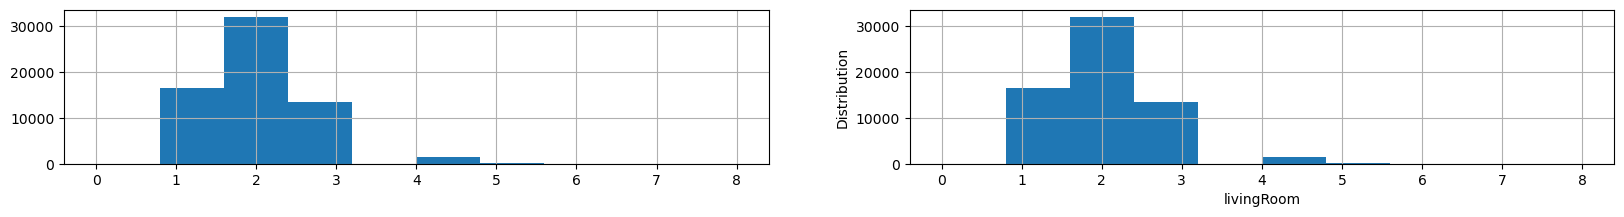

In [33]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

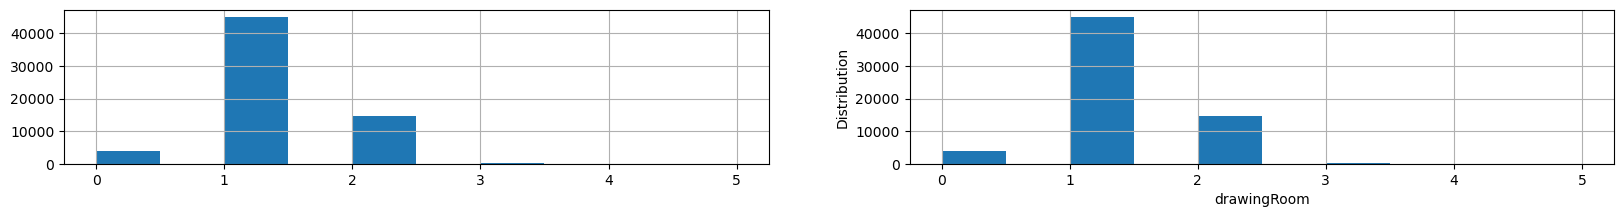

In [34]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be seen that the graphs do not show significant changes from one to the other, therefore the distributions remain constant.

Identifying which columns have missing values:

In [35]:
data.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 77760 to 192545
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  63770 non-null  float64
 1   Lat                  63770 non-null  float64
 2   Cid                  63770 non-null  int64  
 3   tradeTime            63770 non-null  int64  
 4   DOM                  63770 non-null  float64
 5   followers            63770 non-null  int64  
 6   totalPrice           63770 non-null  float64
 7   price                63770 non-null  int64  
 8   square               63770 non-null  float64
 9   livingRoom           63770 non-null  float64
 10  drawingRoom          63770 non-null  float64
 11  kitchen              63770 non-null  int64  
 12  bathRoom             63770 non-null  int64  
 13  buildingType         63770 non-null  float64
 14  constructionTime     63770 non-null  float64
 15  renovationCondition  63770 non-null 

## Data standardization

In [37]:
from sklearn import preprocessing

X = data.drop('price', axis=1)
y = data['price']

X_scaled = preprocessing.scale(X)

C:\Users\monte\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [38]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

## Visualising Data

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=1, errors='ignore')
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=0, errors='ignore')

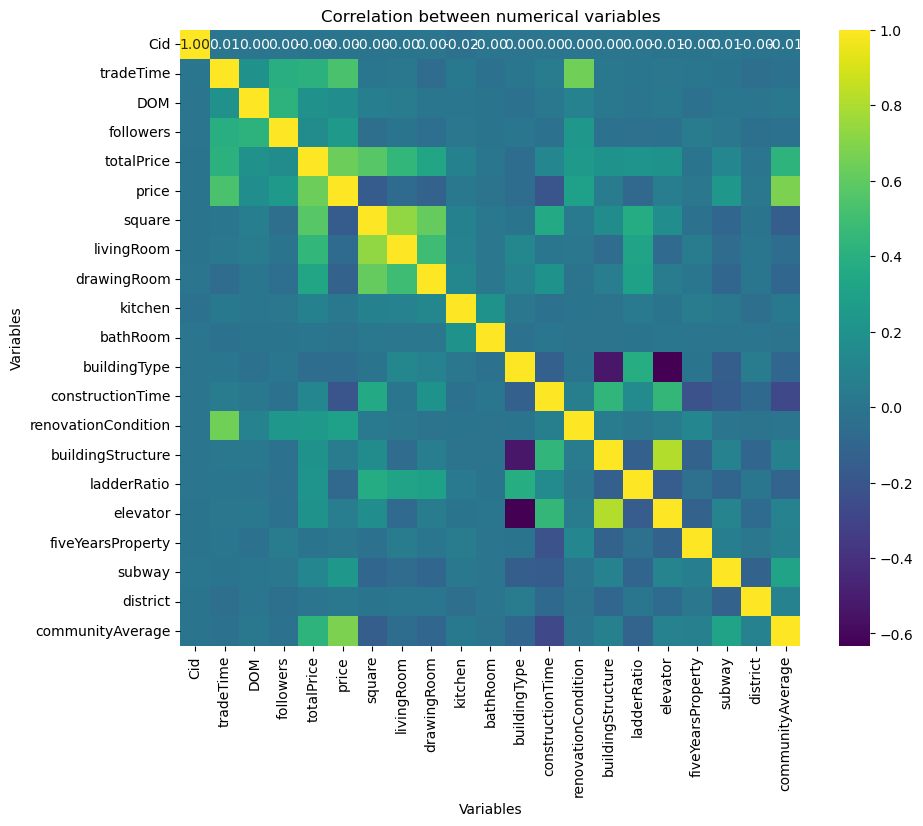

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation between numerical variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


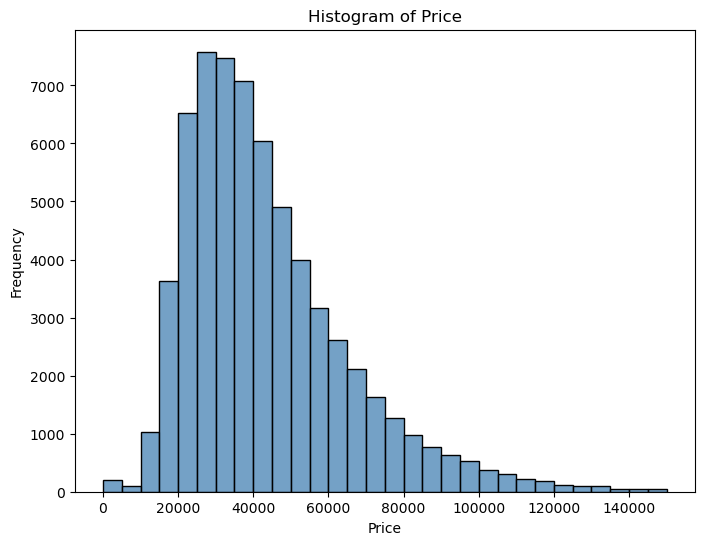

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='price', color='steelblue', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [42]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
quantiles_teoricos = np.random.normal(loc=0, scale=1, size=len(data['price']))
price_sorted = np.sort(data['price'])
quantiles = stats.norm.ppf(np.linspace(0, 1, len(price_sorted)))

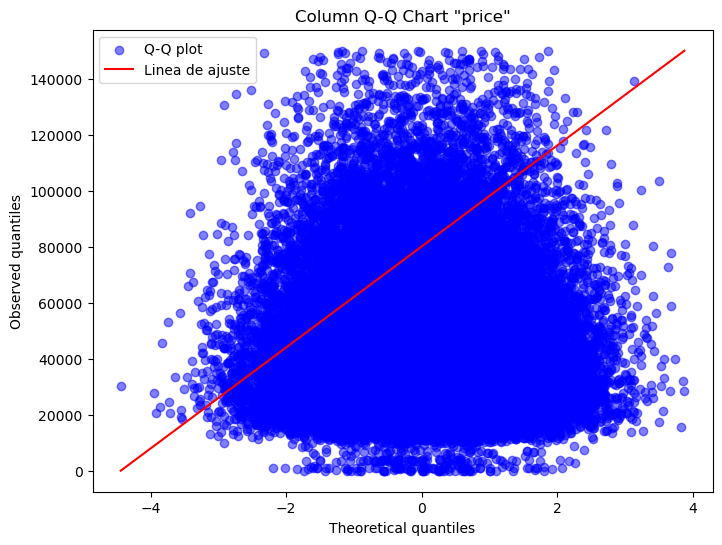

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_teoricos, price_sorted, color='blue', alpha=0.5, label='Q-Q plot')
plt.plot([np.min(quantiles_teoricos), np.max(quantiles_teoricos)], [np.min(price_sorted), np.max(price_sorted)], color='red', label='Linea de ajuste')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Observed quantiles')
plt.title('Column Q-Q Chart "price"')
plt.legend()
plt.show()

# Model Linear Regression

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [45]:
test_sizes = [0.2, 0.25, 0.3]
linear_scores = []

In [46]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=test_size, random_state=42)
    
    lm = LinearRegression()
    scores = cross_val_score(lm, X_train, y_train, cv=5, scoring="r2")
    
    linear_scores.append(scores)

In [47]:
for i, size in enumerate(test_sizes):
    print(f"R2 score for LR on {size}: {np.mean(linear_scores[i])}")

R2 score for LR on 0.2: 0.876314677151864
R2 score for LR on 0.25: 0.8760631130600627
R2 score for LR on 0.3: 0.8753924720006122


## Hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

### Hyperparameter tuning

### Linear Regretion

In [49]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'n_jobs': [50, 100, 150]}
    
lm = LinearRegression()

gs = GridSearchCV(lm, param_grid=param_grid, cv=5)

gs.fit(X_train_linear, y_train_linear)

lm_best_params = gs.best_params_
lm_best_score = gs.best_score_
best_estimator = gs.best_estimator_

print("Best params for LR: ", lm_best_params)
print("Best score: ", lm_best_score)

Best params for LR:  {'n_jobs': 50}
Best score:  0.8753924692967747


### Coefficients Calculation

In [50]:
print("Intercepto:", best_estimator.intercept_)
print("Coeficientes:", best_estimator.coef_)

Intercepto: -7531550.353696657
Coeficientes: [-4.29761039e+02  3.21893643e+03 -2.68448571e-11  3.79032095e+03
  6.86691437e+00  1.40128501e+01  6.51224654e+01 -2.90871684e+02
 -1.63714326e+02  9.38408881e+02 -1.61452927e+03  3.82271587e+00
 -5.57550479e+01 -7.63162535e+01 -8.70685551e+02 -3.21353577e+02
 -1.77426525e+03  8.73904698e+01 -9.98742688e+02  4.80775876e+02
 -3.43647124e+01  3.04361101e-01]


### RMSE y R^2

In [51]:
y_pred = best_estimator.predict(X_test_linear)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred))
r2 = r2_score(y_test_linear, y_pred)

In [54]:
print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 7709.115408957083
R^2: 0.8752607222803248


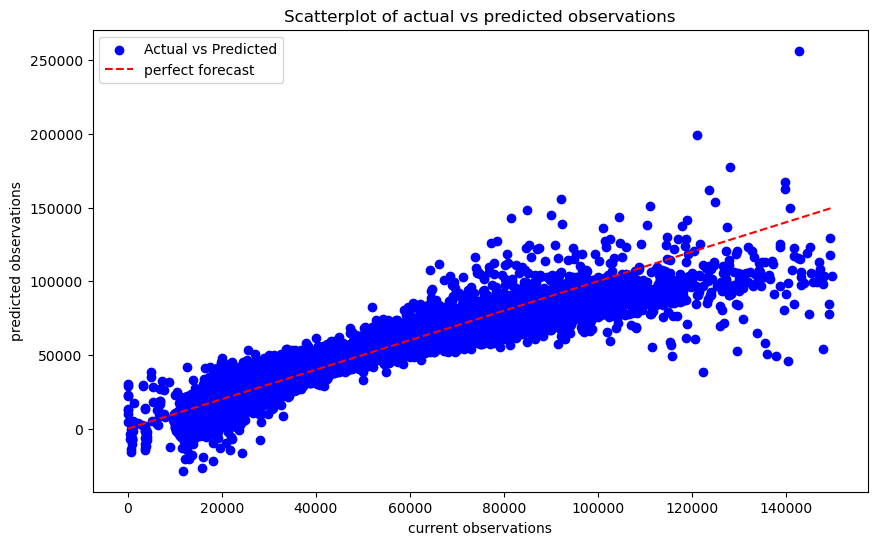

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='perfect forecast')

plt.title('Scatterplot of actual vs predicted observations')
plt.xlabel('current observations')
plt.ylabel('predicted observations')
plt.legend()
plt.show()

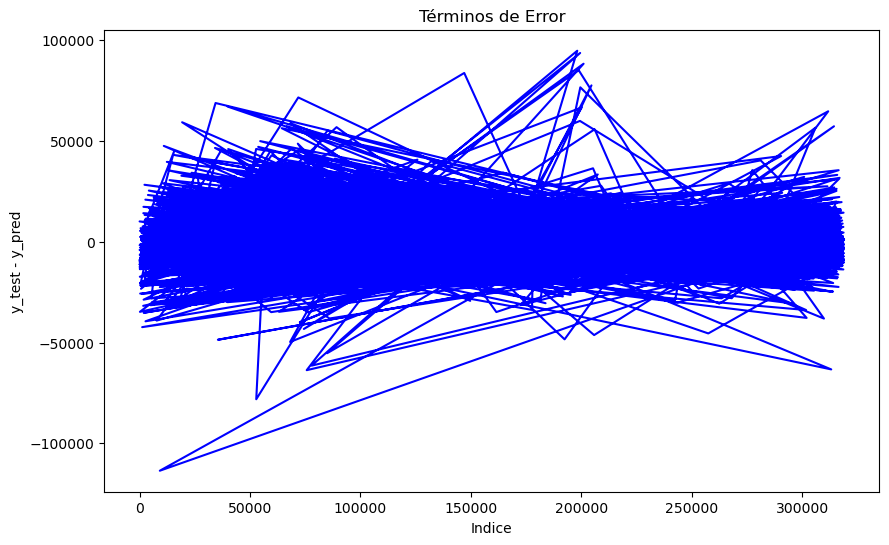

In [74]:
error_terms = y_test_linear - y_pred
plt.figure(figsize=(10, 6))

plt.plot(error_terms, color='blue')
plt.title('Términos de Error')
plt.xlabel('Indice')
plt.ylabel('y_test - y_pred')
plt.show()

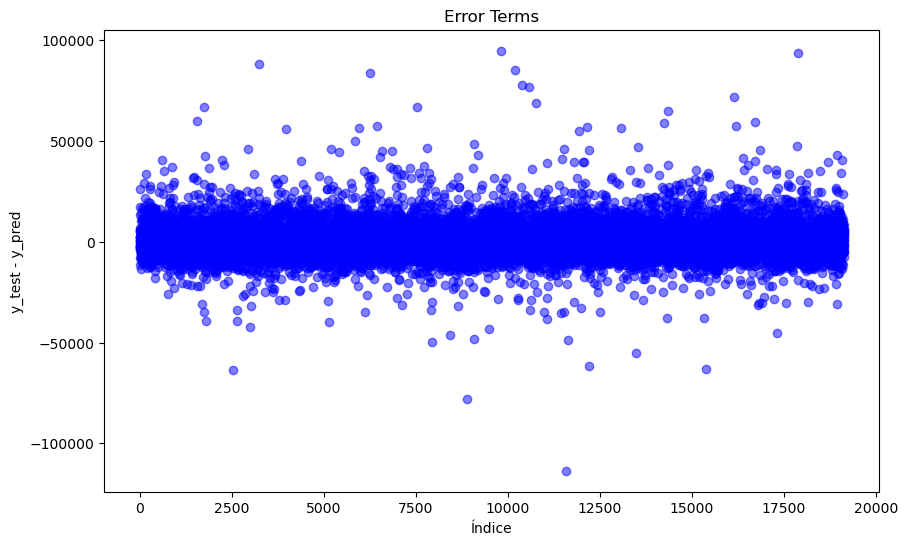

In [76]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(error_terms)), error_terms, color='blue', alpha=0.5)
plt.title('Error Terms')
plt.xlabel('Índice')
plt.ylabel('y_test - y_pred')
plt.show()

# Graphics

Testing our modes withing the best split and best hyperparameters

In [57]:
# getting the testing score of both models

Plotting the TP, FP, TN, FN with a confussion matrix and heat map

In [58]:
# compare test labels and predited labels